<a href="https://colab.research.google.com/github/divs1234/fakeReviewDetection/blob/master/anotherTry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os

import pandas as pd
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np


In [143]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
neg_deceptive_folder_path = 'drive/My Drive/op_spam_v1.4/negative_polarity/deceptive_from_MTurk/'
neg_true_folder_path = 'drive/My Drive/op_spam_v1.4/negative_polarity/truthful_from_Web/'
pos_deceptive_folder_path = 'drive/My Drive/op_spam_v1.4/positive_polarity/deceptive_from_MTurk/'
pos_true_folder_path = 'drive/My Drive/op_spam_v1.4/positive_polarity/truthful_from_TripAdvisor/'
print(neg_deceptive_folder_path)

drive/My Drive/op_spam_v1.4/negative_polarity/deceptive_from_MTurk/


In [145]:
polarity_class = []
reviews = []
spamity_class =[]
size_review = []
for i in range(1,6):
    insideptru = pos_true_folder_path + 'fold' + str(i) 
    insidepdec = pos_deceptive_folder_path + 'fold' + str(i)
    insidentru = neg_true_folder_path + 'fold' + str(i) 
    insidendec = neg_deceptive_folder_path + 'fold' + str(i) 
    pos_list = []
    for data_file in sorted(os.listdir(insidendec)):
        polarity_class.append('negative')
        spamity_class.append(str(data_file.split('_')[0]))
        count = 0
        with open(os.path.join(insidendec, data_file)) as f:
                contents = f.read()
                reviews.append(contents)
                count = str(len(contents.split()))
        size_review.append(count)
    for data_file in sorted(os.listdir(insidentru)):
        polarity_class.append('negative')
        spamity_class.append(str(data_file.split('_')[0]))
        count = 0
        with open(os.path.join(insidentru, data_file)) as f:
                contents = f.read()
                reviews.append(contents)
                count = str(len(contents.split()))
        size_review.append(count)
    for data_file in sorted(os.listdir(insidepdec)):
        polarity_class.append('positive')
        spamity_class.append(str(data_file.split('_')[0]))
        count = 0
        with open(os.path.join(insidepdec, data_file)) as f:
                contents = f.read()
                reviews.append(contents)
                count = str(len(contents.split()))
        size_review.append(count)
    for data_file in sorted(os.listdir(insideptru)):
        polarity_class.append('positive')
        spamity_class.append(str(data_file.split('_')[0]))
        count = 0
        with open(os.path.join(insideptru, data_file)) as f:
                contents = f.read()
                reviews.append(contents)
                count = str(len(contents.split()))
        size_review.append(count)
print(reviews)

['We stayed at the Schicago Hilton for 4 days and 3 nights for a conference. I have to say, normally I am very easy going about amenities, cleanliness, and the like...however our experience at the Hilton was so awful I am taking the time to actually write this review. Truly, DO NOT stay at this hotel. When we arrived in our room, it was clear that the carpet hadn\'t been vacuumed. I figuered, "okay, it\'s just the carpet." Until I saw the bathroom! Although the bathroom had all the superficial indicators of housekeeping having recently cleaned (i.e., a paper band across the toilet, paper caps on the drinking glasses, etc., it was clear that no ACTUAL cleaning took place. There was a spot (probably urine!) on the toilet seat and, I kid you not, the remnants of a lip-smudge on the glass. I know people who have worked many years in the hotel industry and they always warned that lazy housekeeping will make things "appear" clean but in fact they make no effort to keep things sanitary. Well,

In [0]:
data_fm = pd.DataFrame({'polarity_class':polarity_class,'review':reviews,'spamity_class':spamity_class})

data_fm.loc[data_fm['spamity_class']=='d','spamity_class']=0
data_fm.loc[data_fm['spamity_class']=='t','spamity_class']=1

In [147]:
data_x = data_fm['review']

data_y = np.asarray(data_fm['spamity_class'],dtype=int)

#X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3)
print(data_x)

0       We stayed at the Schicago Hilton for 4 days an...
1       Hotel is located 1/2 mile from the train stati...
2       I made my reservation at the Hilton Chicago be...
3       When most people think Hilton, they think luxu...
4       My husband and I recently stayed stayed at the...
                              ...                        
1605    beautiful place with European charm. No compla...
1606    Spent three nights at the hotel for a girls we...
1607    It has been a couple of years since I stayed h...
1608    Stayed here October 31 through November 5 for ...
1609    We just returned from a girls shopping /sight-...
Name: review, Length: 1610, dtype: object


In [148]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [0]:
all_text = ''.join([c for c in reviews if c not in punctuation])

In [150]:
reviews_split = all_text.split('\n')
print ('Number of reviews :', len(reviews_split))
print(reviews_split)

Number of reviews : 1611
['We stayed at the Schicago Hilton for 4 days and 3 nights for a conference. I have to say, normally I am very easy going about amenities, cleanliness, and the like...however our experience at the Hilton was so awful I am taking the time to actually write this review. Truly, DO NOT stay at this hotel. When we arrived in our room, it was clear that the carpet hadn\'t been vacuumed. I figuered, "okay, it\'s just the carpet." Until I saw the bathroom! Although the bathroom had all the superficial indicators of housekeeping having recently cleaned (i.e., a paper band across the toilet, paper caps on the drinking glasses, etc., it was clear that no ACTUAL cleaning took place. There was a spot (probably urine!) on the toilet seat and, I kid you not, the remnants of a lip-smudge on the glass. I know people who have worked many years in the hotel industry and they always warned that lazy housekeeping will make things "appear" clean but in fact they make no effort to ke

In [151]:
from collections import Counter
all_text2 = ' '.join(reviews_split)
# create a list of words
words = all_text2.split()
# Count all the words using Counter Method
count_words = Counter(words)

total_words = len(words)
sorted_words = count_words.most_common(total_words)
print(sorted_words)

[('the', 12858), ('and', 7794), ('to', 6711), ('a', 6353), ('I', 5983), ('was', 5807), ('in', 3617), ('of', 3297), ('The', 3162), ('for', 2738), ('at', 2257), ('is', 2136), ('hotel', 2077), ('room', 2042), ('we', 2016), ('that', 1935), ('my', 1829), ('it', 1745), ('were', 1731), ('with', 1721), ('had', 1673), ('not', 1586), ('on', 1514), ('but', 1291), ('this', 1280), ('very', 1226), ('our', 1217), ('have', 1197), ('We', 1107), ('they', 1047), ('stay', 1040), ('be', 1008), ('you', 968), ('Chicago', 962), ('as', 929), ('from', 928), ('would', 873), ('are', 806), ('there', 773), ('so', 763), ('staff', 690), ('all', 673), ('me', 659), ('an', 634), ('great', 629), ('stayed', 627), ('when', 599), ('service', 583), ('one', 571), ('like', 538), ('get', 532), ('out', 517), ('rooms', 512), ('will', 510), ('up', 507), ('no', 504), ('just', 490), ('about', 489), ('My', 479), ('or', 474), ('It', 472), ('us', 468), ('Hotel', 462), ('could', 452), ('did', 446), ('by', 432), ('hotel.', 431), ('which'

In [0]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

In [153]:
print(vocab_to_int)

{'the': 1, 'and': 2, 'to': 3, 'a': 4, 'I': 5, 'was': 6, 'in': 7, 'of': 8, 'The': 9, 'for': 10, 'at': 11, 'is': 12, 'hotel': 13, 'room': 14, 'we': 15, 'that': 16, 'my': 17, 'it': 18, 'were': 19, 'with': 20, 'had': 21, 'not': 22, 'on': 23, 'but': 24, 'this': 25, 'very': 26, 'our': 27, 'have': 28, 'We': 29, 'they': 30, 'stay': 31, 'be': 32, 'you': 33, 'Chicago': 34, 'as': 35, 'from': 36, 'would': 37, 'are': 38, 'there': 39, 'so': 40, 'staff': 41, 'all': 42, 'me': 43, 'an': 44, 'great': 45, 'stayed': 46, 'when': 47, 'service': 48, 'one': 49, 'like': 50, 'get': 51, 'out': 52, 'rooms': 53, 'will': 54, 'up': 55, 'no': 56, 'just': 57, 'about': 58, 'My': 59, 'or': 60, 'It': 61, 'us': 62, 'Hotel': 63, 'could': 64, 'did': 65, 'by': 66, 'hotel.': 67, 'which': 68, 'only': 69, 'desk': 70, 'even': 71, 'This': 72, 'time': 73, '-': 74, 'got': 75, 'if': 76, 'front': 77, 'nice': 78, 'their': 79, 'been': 80, 'When': 81, 'more': 82, 'some': 83, 'night': 84, 'room.': 85, 'than': 86, 'They': 87, 'also': 88, 

In [154]:
reviews_int = []
for review in reviews_split:
    r = [vocab_to_int[w] for w in review.split()]
    reviews_int.append(r)
print (len(reviews_int))

1611


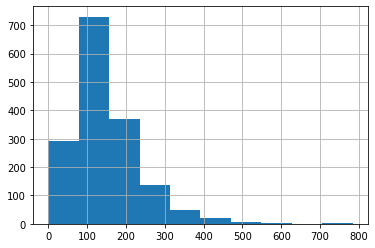

count    1611.000000
mean      148.754811
std        87.335713
min         0.000000
25%        88.500000
50%       128.000000
75%       182.500000
max       784.000000
dtype: float64

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
reviews_len = [len(x) for x in reviews_int]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

In [156]:
reviews_int = [ reviews_int[i] for i, l in enumerate(reviews_len) if l>0 ]
data_y = [ data_y[i] for i, l in enumerate(reviews_len) if l>0 ]
print(len(reviews_int))

1610


In [0]:
def pad_features(reviews_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
        print (features[:10,:])
    return features

In [158]:
reviews_int = pad_features(reviews_int,150)
print(len(reviews_int[0]))

Streaming output truncated to the last 5000 lines.
[[  29   46   11 ... 1041  147  661]
 [   0    0    0 ... 5597 8195  736]
 [   5   99   17 ...    1   93  872]
 ...
 [   0    0    0 ...   31   89  677]
 [   0    0    0 ...    1  192 1083]
 [   0    0    0 ...   11   25 8262]]
[[  29   46   11 ... 1041  147  661]
 [   0    0    0 ... 5597 8195  736]
 [   5   99   17 ...    1   93  872]
 ...
 [   0    0    0 ...   31   89  677]
 [   0    0    0 ...    1  192 1083]
 [   0    0    0 ...   11   25 8262]]
[[  29   46   11 ... 1041  147  661]
 [   0    0    0 ... 5597 8195  736]
 [   5   99   17 ...    1   93  872]
 ...
 [   0    0    0 ...   31   89  677]
 [   0    0    0 ...    1  192 1083]
 [   0    0    0 ...   11   25 8262]]
[[  29   46   11 ... 1041  147  661]
 [   0    0    0 ... 5597 8195  736]
 [   5   99   17 ...    1   93  872]
 ...
 [   0    0    0 ...   31   89  677]
 [   0    0    0 ...    1  192 1083]
 [   0    0    0 ...   11   25 8262]]
[[  29   46   11 ... 1041  147  661]


In [159]:
data = {}
df = pd.DataFrame(data) 

dx = np.transpose(reviews_int)
# print(len(dx))
i = 0
for y in dx:
  # print(len(y))
  df[str(i)] = np.array(y)
  i = i+1

print(df)

       0    1   2    3     4    5  ...   144    145    146   147    148   149
0     29   46  11    1  8163  192  ...   165    144     28  1041    147   661
1      0    0   0    0     0    0  ...   133    266      4  5597   8195   736
2      5   99  17  226    11    1  ...     3   1162      7     1     93   872
3      0    0   0   81   173  165  ...     9     48    243  1892     32  1893
4     59  150   2    5   233   46  ...  2256     61      6  8211      2    21
...   ..  ...  ..  ...   ...  ...  ...   ...    ...    ...   ...    ...   ...
1605   0    0   0    0     0    0  ...    45   1434  19292  1321  19293   149
1606   0    0   0    0     0    0  ...   668     10      4   199      3    90
1607   0    0   0    0     0    0  ...     4     45    208   356    260  1464
1608   0    0   0    0     0    0  ...     2    630    424    31     89   677
1609   0    0   0    0     0    0  ...     3  19309     12     4     45  1193

[1610 rows x 150 columns]


In [160]:
X_train, X_test, y_train, y_test = train_test_split(df, data_y, test_size=0.3)

print(X_train)
print(X_test)

          0     1    2      3     4      5  ...   144   145  146    147  148   149
1447      0     0    0      0     0      0  ...    12    26  624    863   12  4331
521      81     5  111    154    17    226  ...  3921    23    1   2612    8    17
972   14991  4722   27  14992    59    176  ...     9  7692  790      7    1  5240
657       5   233   21      1  5966      8  ...    65    22   28      4   26   100
1416    416   112    5  18123    25  18124  ...   214     2  436     20  791     8
...     ...   ...  ...    ...   ...    ...  ...   ...   ...  ...    ...  ...   ...
114       5    57  513     36     4    157  ...   126     2  126    167  312   248
501       0     0    0      0     0      0  ...  3401    47    5    432    3    90
87        0     0    0      0     0      0  ...  8836    33    3    122   10  8837
206       0     0    0      0     0      0  ...     1    93   73      5  254    90
989       5    46  335    193   233     11  ...   895    79  205  15178  210     2

[11

In [161]:
nbayes = MultinomialNB()

nbayes.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
y_predictions = nbayes.predict(X_test)
y_result = list(y_predictions)

In [163]:
print("Accuracy % :",metrics.accuracy_score(y_test, y_predictions)*100)
print("Precision Score: ", precision_score(y_test, y_predictions, average='micro'))
print("Recall Score: ",recall_score(y_test, y_predictions, average='micro') )
print("F1 Score: ",f1_score(y_test, y_predictions, average='micro') )

Accuracy % : 56.52173913043478
Precision Score:  0.5652173913043478
Recall Score:  0.5652173913043478
F1 Score:  0.5652173913043478
